# Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation 
Data Mining Lab 4, UVic Spring 2022 <br>


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Outlines
## MLE 

MLE produces a point estimate that maximizes __likelihood function__ of the unknow parameters given observations (i.e., data), the likelihood function has a form of $p(data|\theta)$.

## MAP



MAP is a generalized case of MLE. It also produces a point estimate, which is the mode of the posterior distribution of the parameters. $p(\theta|data) \sim p(data|\theta)p(\theta)$

### Coin toss
Most tutorials on MLE/MAP start with coin toss because it is a simple yet useful example to explain this topic.


Suppose that we have a coin but we do not know if it is fair not. In other words, we have no idea whether the probability of getting head (H) is the same as tail (T). In this case, how can we estimate such probability?

A natural way to do this is to flip this coin for several times to see how many H’s and T’s do we have. Before we start the experiment, let’s define some notations:

$X$: a random variable that represents the coin toss outcome (1 for H and 0 for T)

$\theta$: the probability of getting H. In other words, $\theta$ is the parameter that we should learn. If it equals 0.5 it means the coin is fair otherwise it is not. 

__MLE:__
$$\hat{\theta}_{\rm MLE} = \frac{\alpha_H}{\alpha_H + \alpha_T}$$

Suppose we have an information that tells us that the value of $\theta$ is, say, $\theta_{\rm PRIOR}$. We can combine this prior knowledge with our observation to get estimate.



In [26]:
def flip_coin(times=1000, bias=0.5):
    tosses  = list(np.random.binomial(1, bias, times))
    mapping = {0:"tails", 1:"heads"}
    tosses  = np.vectorize(mapping.get)(tosses)
    return list(tosses)

In [30]:
from collections import Counter

def mle_estimate(total_heads, total_tails):
    return total_heads/(total_heads+total_tails)


def sequential_mle_estimates(tosses):
    estimates = []
    total_heads = 0
    total_tails = 0
    for i in range(len(tosses)):
        if tosses[i]=='heads':
            total_heads+=1
        else:
            total_tails+=1
        estimates.append(mle_estimate(total_heads, total_tails))
    return estimates

In [36]:
theta              = 0.4
total_tosses       = 420


coin_flips         = flip_coin(total_tosses, theta)
mle_estimates      = sequential_mle_estimates(coin_flips)

### Plot MLE estimates

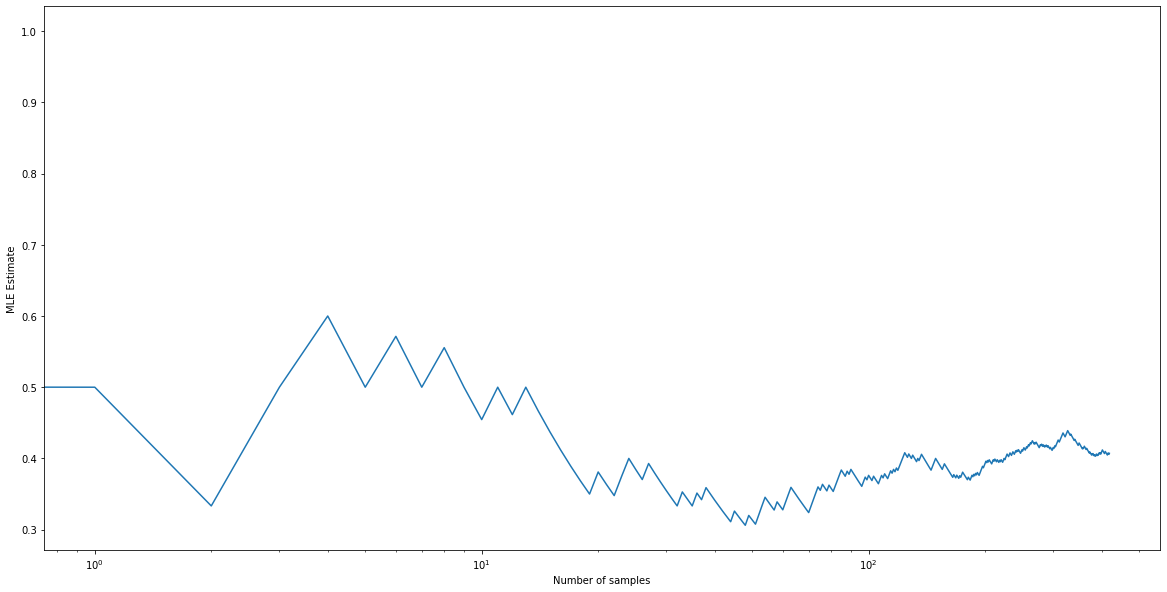

In [37]:
import matplotlib
import matplotlib.pyplot as plt

def plot_estimates(estimates_all_exp, y_name = "Estimated theta"):
    matplotlib.rc('figure', figsize=(20, 10))
    plt.xlabel("Number of samples")
    plt.ylabel(y_name)
    plt.xscale("log")
    for each_exp_estimates in estimates_all_exp:
        plt.plot(each_exp_estimates)
    plt.show()    
plot_estimates([mle_estimates], "MLE Estimate")

### Plot MLE estimates from multiple experiment
 In this step we will simulate 20 experiments from 20 different coins and see the MLE estimation process.

estimates for all the experiments are available


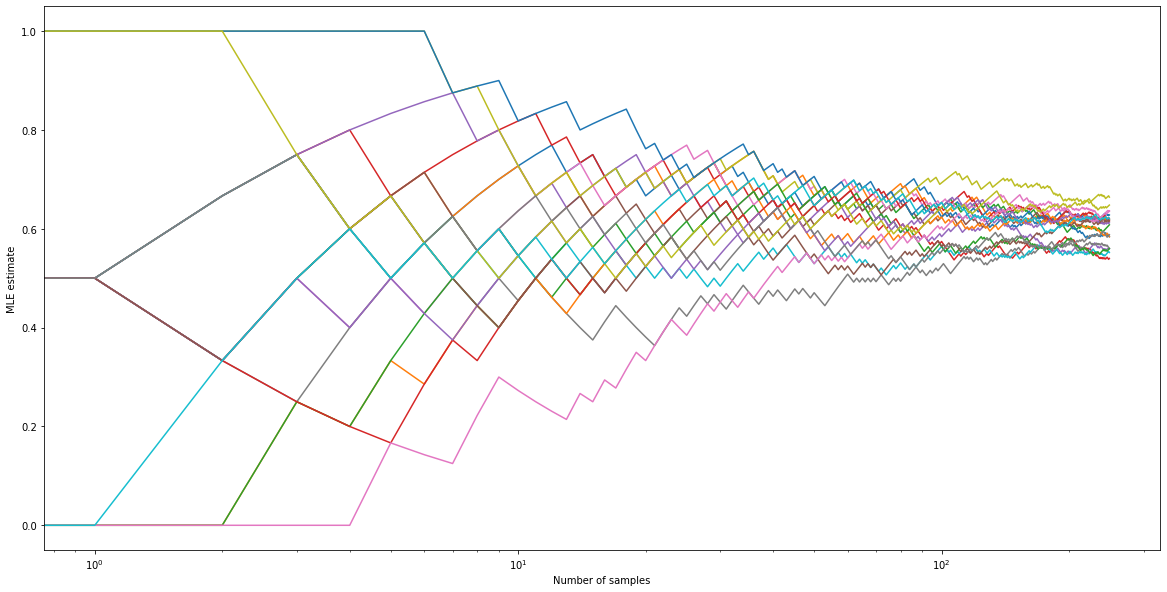

In [38]:
total_experiments              = 20
every_experiment_estimates     = [] 
theta                          = 0.6 
total_tosses                   = 250 
for exp_number in range(total_experiments):
    coin_flips         = flip_coin(total_tosses, theta)
    mle_estimates      = sequential_mle_estimates(coin_flips)
    every_experiment_estimates.append(mle_estimates)
print("estimates for all the experiments are available")    
plot_estimates(every_experiment_estimates, "MLE estimate")

__MAP estimate:__
$$\hat{\theta}_{\rm MAP} = \frac{(\alpha_H + \gamma_H)}{(\alpha_H + \gamma_H) + (\alpha_T + \gamma_T)}$$

Here $\gamma_H$ and $\gamma_T$ are values that we chose such that $\gamma_H / (\gamma_H + \gamma_T) = \alpha_{\rm PRIOR}$. Their values depend on how much our confidence is on the prior knowledge. The more our confidence is, the larger $\gamma_H$ and $\gamma_T$ are. For example, suppose $\theta_{\rm PRIOR} = 0.6$. We can choose $\gamma_H = 6$ and $\gamma_T = 4$ (low confidence), or $\gamma_H = 60$ and $\gamma_T = 40$ (higher confidence).

In [39]:
def give_prior_belief(p_heads, p_tails):
    total = p_heads+p_tails
    if total>0:
        print("Prior belief of P(heads) is ", p_heads/(p_heads+p_tails))
    else:
        print("uninformed prior")
    return p_heads+1, p_tails+1

def map_estimate(total_heads, total_tails, a, b):
    numerator   = total_heads + a-1
    denominator = total_heads + total_tails + a + b - 2
    return numerator/denominator



def sequential_map_estimates(tosses, a, b):
    estimates   = []
    total_heads = 0
    total_tails = 0
    for i in range(len(tosses)):
        if tosses[i]=='heads':
            total_heads+=1
        else:
            total_tails+=1
        estimates.append(map_estimate(total_heads, total_tails, a, b))
    return estimates

In [40]:
p_heads = 60
p_tails = 40
theta              = 0.6
total_tosses       = 700 
a, b               = give_prior_belief(p_heads, p_tails)
coin_flips         = flip_coin(total_tosses, theta)
map_estimates      = sequential_map_estimates(coin_flips, a, b)

Prior belief of P(heads) is  0.6


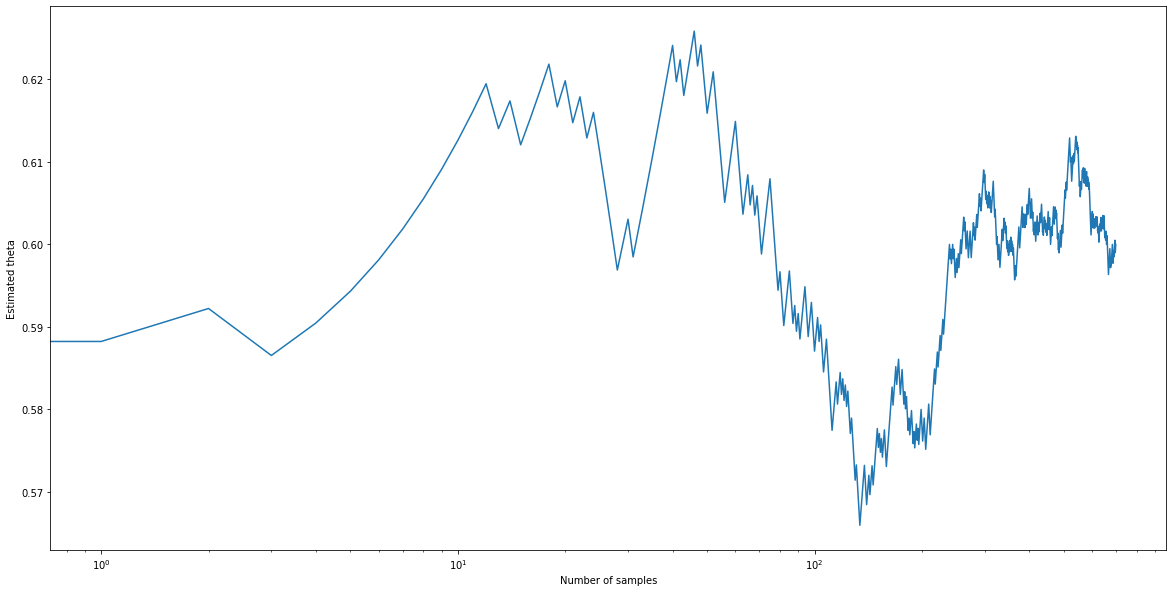

In [41]:
plot_estimates([map_estimates])

### Multiple MAP estimates

Prior belief of P(heads) is  0.6
estimates for all the experiments are available


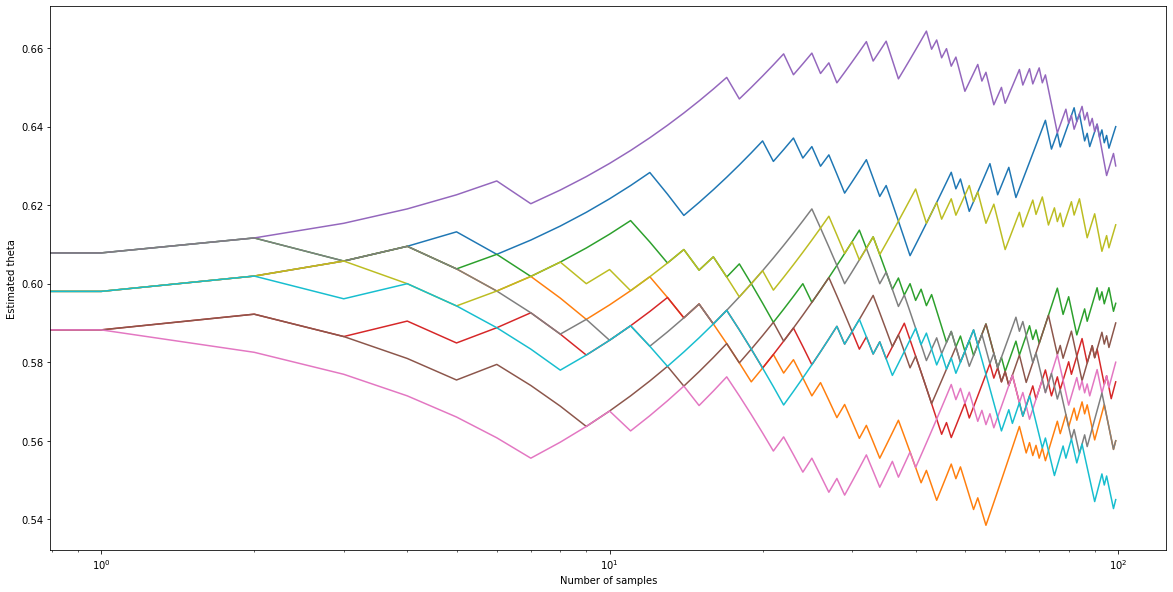

In [42]:
total_experiments= 10
theta= 0.6
total_tosses= 100 

every_experiment_estimates= [] 
p_heads= 60
p_tails= 40
a, b= give_prior_belief(p_heads, p_tails)

for exp_number in range(1, total_experiments+1):
    coin_flips         = flip_coin(total_tosses, theta)
    mle_estimates      = sequential_map_estimates(coin_flips, a, b)
    every_experiment_estimates.append(mle_estimates)
print("estimates for all the experiments are available")   
plot_estimates(every_experiment_estimates)


__MLE vs MAP__

In [43]:
from scipy.stats import beta

def plot_my_estimates(estimates_all_exp, ax):
    for each_exp_estimates in estimates_all_exp:
        ax.plot(each_exp_estimates)


def plot_all_estimates(mle_estimates, map_estimates, a, b):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    beta_dist            = beta(a, b)
    ax1.set_title("Prior Belief (alpha="+str(a)+", beta="+str(b)+")")
    ax1.set_xlim(0, 1)
    ax1.set_xlabel("theta")
#     ax1.set_ylim(0, 3)
    x = np.linspace(0, 1, 1000)
    ax1.plot(x, beta_dist.pdf(x))

    ax2.set_title("MLE estimate")
    ax2.set_ylim(0, 1)
    ax2.set_xscale("log")
    ax2.set_xlabel("Number of samples")
    ax2.set_ylabel("theta_estimated")
    plot_my_estimates(mle_estimates, ax2)
    
    
    ax3.set_title("MAP estimate")
    ax3.set_xscale("log")
    ax3.set_ylim(0, 1)
    ax3.set_xlabel("Number of samples")
    ax3.set_ylabel("theta_estimated")
    plot_my_estimates(map_estimates, ax3)
    
    
def simulate_experiment(theta, total_experiments, total_tosses, p_heads, p_tails):
    mle_experiment_estimates       = []
    map_experiment_estimates       = []
    a, b                           = give_prior_belief(p_heads, p_tails)
    for exp_number in range(1, total_experiments+1):
        coin_flips         = flip_coin(total_tosses, theta)
        mle_estimates      = sequential_mle_estimates(coin_flips)
        map_estimates      = sequential_map_estimates(coin_flips, a, b)
        mle_experiment_estimates.append(mle_estimates)
        map_experiment_estimates.append(map_estimates)
    plot_all_estimates(mle_experiment_estimates, map_experiment_estimates, a, b)

__Uninformed Prior Belief: No prior belief__

uninformed prior


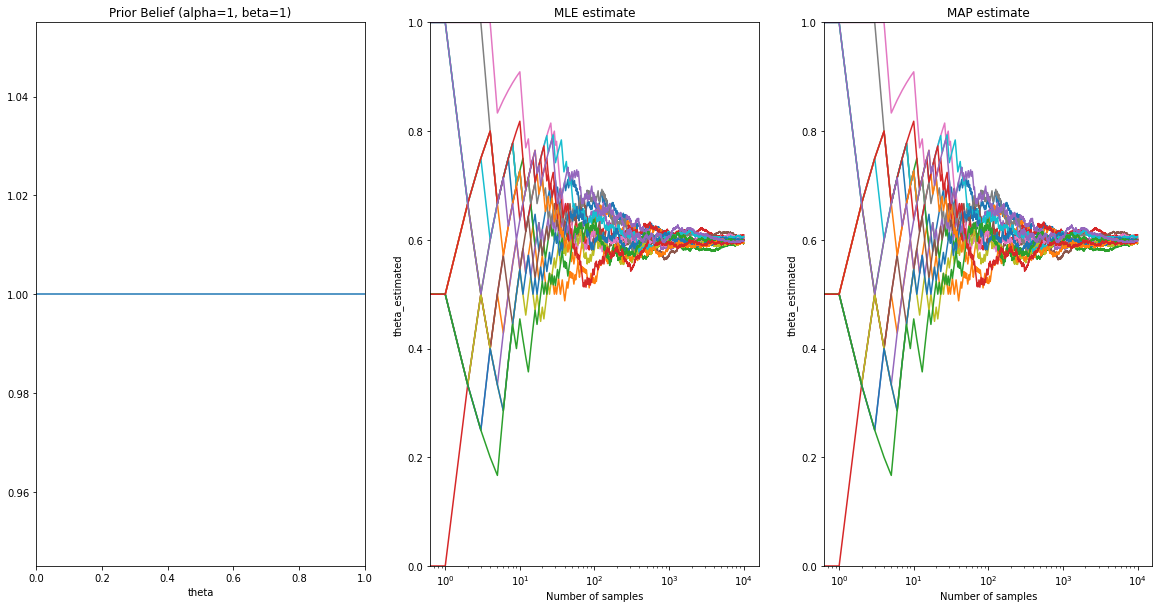

In [44]:
theta= 0.6
total_experiments= 15
total_tosses= 10000
p_heads= 0
p_tails= 0
simulate_experiment(theta, total_experiments, total_tosses, p_heads, p_tails)

__General Prior ($\theta \sim 0.5$)__

Prior belief of P(heads) is  0.5


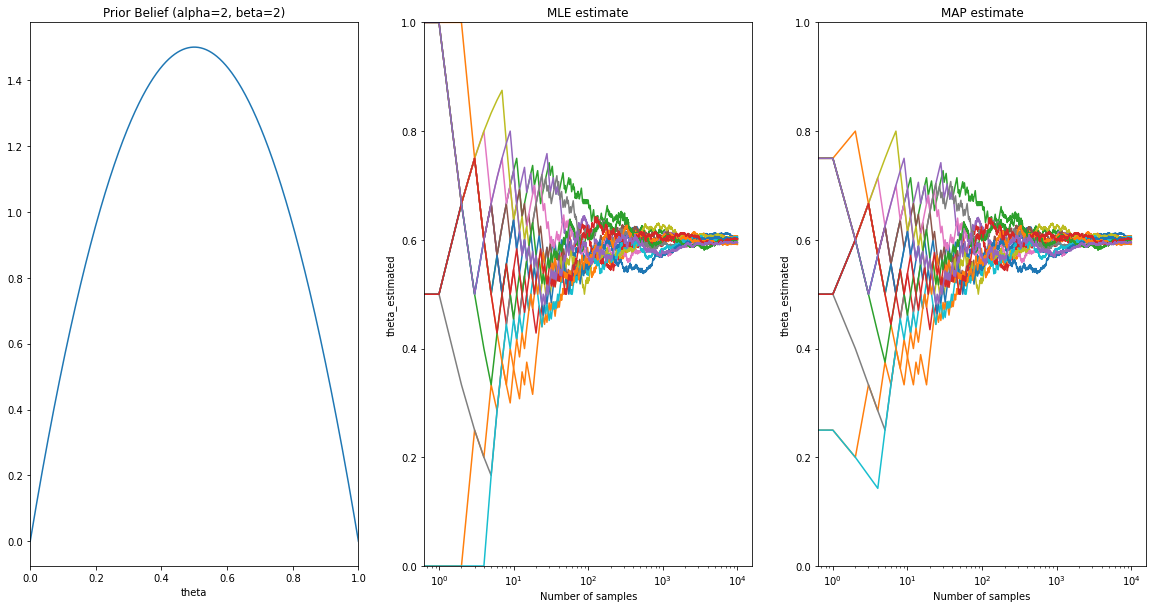

In [45]:
theta= 0.6
total_experiments= 15
total_tosses= 10000
p_heads= 1
p_tails= 1
simulate_experiment(theta, total_experiments, total_tosses, p_heads, p_tails)

__General Prior with more confidence__


Prior belief of P(heads) is  0.5


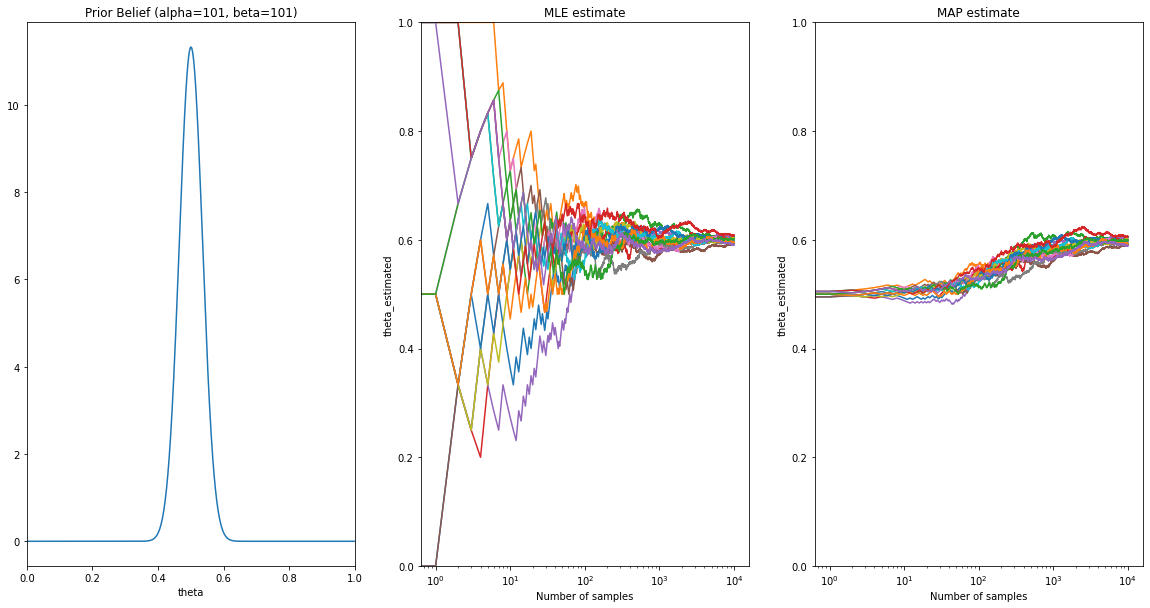

In [46]:
theta= 0.6
total_experiments= 15
total_tosses= 10000 
p_heads= 100
p_tails= 100
simulate_experiment(theta, total_experiments, total_tosses, p_heads, p_tails)

__Right belief__

Prior belief of P(heads) is  0.6


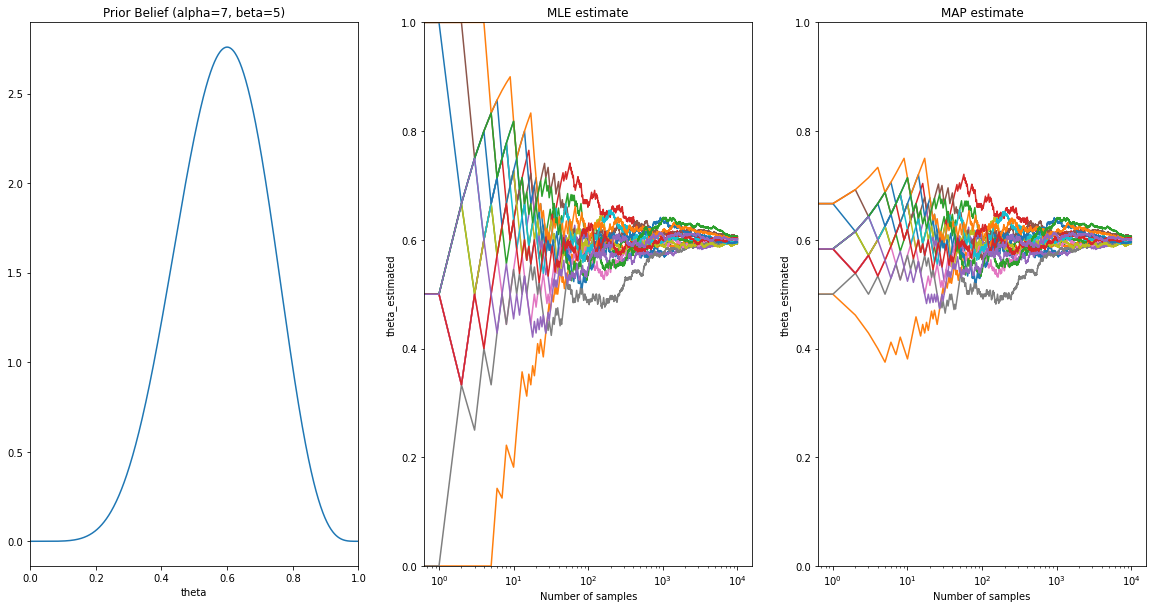

In [47]:
theta= 0.6
total_experiments= 15
total_tosses= 10000 
p_heads= 6
p_tails= 4
simulate_experiment(theta, total_experiments, total_tosses, p_heads, p_tails)


__Feeding right belief with confidence__

Prior belief of P(heads) is  0.6


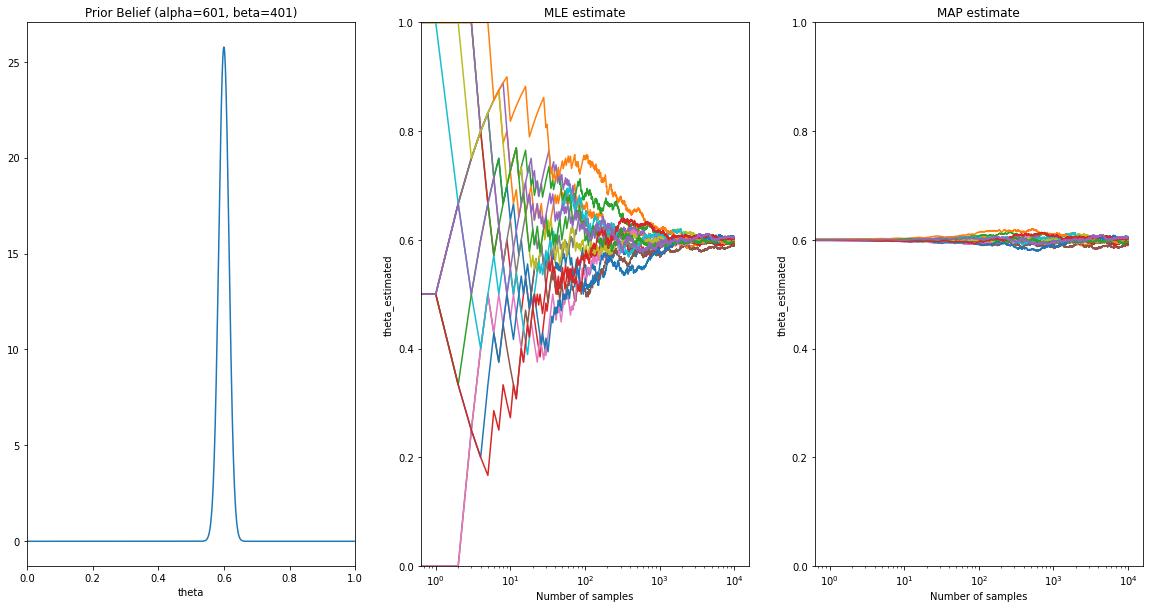

In [48]:
theta= 0.6
total_experiments= 15
total_tosses= 10000 
p_heads= 600
p_tails= 400
simulate_experiment(theta, total_experiments, total_tosses, p_heads, p_tails)

## Univariate Normal Distribution:
**Related article: https://towardsdatascience.com/univariate-and-multivariate-gaussian-distribution-clear-understanding-with-visuals-5b85e53ea76**<br /><br />
The probability of getting $x$ drawn from a normal distribution $N(\mu, \sigma^2)$ is

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2} $$

where $\mu$ is the mean, and $\sigma$ is the standard deviation.

Here, for simplicity let us assume that the real standard deviation, $\sigma$, is known. So we only need to estimate $\mu$. 

__MLE:__ 
$$\hat{\mu}_{\rm MLE} = \frac{1}{n} \sum_{j=1}^n x_j,$$
and 
\begin{equation}
\hat{\sigma}_{MLE} = \sqrt{\frac{1}{n}\sum_{i}^{n}(x_i - \mu)^2}
\end{equation}
but, we can use $\hat{\mu}_{MLE}$ instead of $\mu$. 

With prior $N(\mu_0, \sigma_m^2)$, <br>
__MAP estimate:__  
$$\hat{\mu}_{\rm MAP} = \frac{\sigma_m^2 \left(\sum_{j=1}^n x_j \right) + \sigma^2 \mu_0}{\sigma_m^2 n + \sigma^2}$$



In [49]:
# set the constants
N = 250       # max number of draws
mu = 0.0      # the real value of mu
sigma = 1.0   # the real value of sigma
mu_0 = 1.0       # the prior mu
sigma_m = 2.0    # the prior sigma
# Lists to record the observation/estimates
MLE = []
MAP = []
MLE_sigma = []
# initiate the sum
sum_x = 0
list_x = []
for j in range(N):
    # For normal distribution or Gaussian distribution
    x = np.random.normal(mu, sigma)  # Note that we input sigma, not sigma^2 
    #(https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
    list_x.append(x)
    sum_x = sum_x + x
    n = j+1 # n
    mle = sum_x/n # MLE
    squared_sum = 0
    for x in list_x:
        squared_sum += (x - mle)**2
    mle_sigma = math.sqrt((1/(j+1))*squared_sum) #Sigma_MLE
    MLE.append(mle)
    MLE_sigma.append(mle_sigma)
    
# For checking:
# print("For MLE:",MLE)
# print("For MLE sigma:",MLE_sigma)



With prior $N(\mu_0, \sigma_m^2)$, <br>
__MAP estimate:__  
$$\hat{\mu}_{\rm MAP} = \frac{\sigma_m^2 \left(\sum_{j=1}^n x_j \right) + \sigma^2 \mu_0}{\sigma_m^2 n + \sigma^2}$$

In [50]:
# set the constants
N = 250       # max number of draws
mu = 0.0      # the real value of mu
sigma = 1.0   # the real value of sigma
mu_0 = 1.0       # the prior mu
sigma_m = 2.0    # the prior sigma
# Lists to record the observation/estimates
MAP = []
for j in range(N):
    x = np.random.normal(mu, sigma)  # Note that we input sigma, not sigma^2 (see the API)
    list_x.append(x)
    sum_x = sum_x + x
    n = j+1
    mape = (sigma_m*sigma_m*sum_x + sigma*sigma*mu_0)/(sigma_m*sigma_m*n + sigma*sigma) # MAP
    MAP.append(mape)
# For checking:
print("For MAP:",MAP)


For MAP: [-0.397450536647103, 0.3353007397393168, -0.2911890402960149, -0.043919138864703944, 0.21258301088440093, 0.20265070760948425, 0.3513699236336401, 0.22612134440639706, 0.19712213032759826, 0.14302868119657866, 0.020202635328931073, 0.05006873816754738, -0.004888145417413347, -0.037560803032628015, -0.037576659791120515, -0.030881733797469616, 0.027932297148040942, 0.09605353611154528, 0.1746782513580241, 0.17140258552064597, 0.1919751884567673, 0.22547787450230564, 0.1593693176925998, 0.158864391986713, 0.12746591126889048, 0.13873138392868534, 0.17473761454157768, 0.16466034094513865, 0.17106270921599329, 0.15700773482749228, 0.11314183889409452, 0.11840631915774584, 0.08844079556556311, 0.11706515729541853, 0.1481405939884926, 0.10399245434083362, 0.10634736005084855, 0.10186177576459583, 0.10620593350088008, 0.08885058379710352, 0.07407040529408253, 0.07403043650710538, 0.11636826488428499, 0.11745520498833273, 0.1511737966511541, 0.11652903964944804, 0.1188272513854403, 0.

In [51]:
# Set the x (number of flips):
x = np.arange(1, N+1)
# The real theta line, for reference:
RLine = (mu, mu)
xx = (0, N+1)

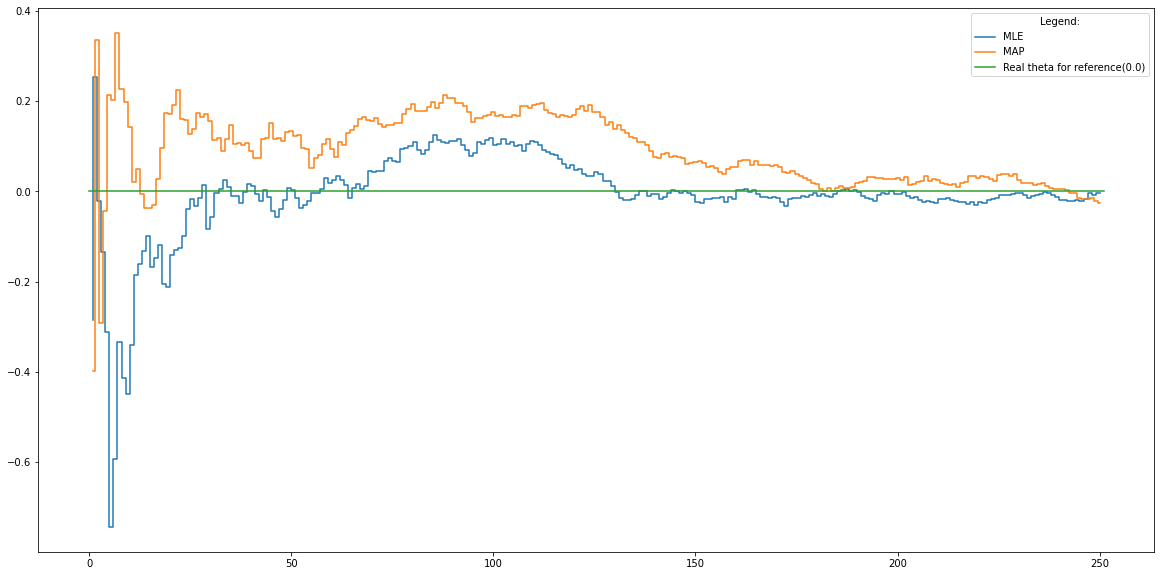

In [52]:
plt.step(x,MLE, label='MLE')
plt.plot(x,MLE, 'C0o', alpha=0.001)

plt.step(x,MAP, where='mid', label='MAP')
plt.plot(x,MAP, 'C1o', alpha=0.001)

plt.step(xx, RLine, where='post', label='Real theta for reference(0.0)')
plt.plot(xx, RLine, 'C2o', alpha=0.001)

plt.legend(title='Legend:')
plt.show()